# PCA on Face Images

### Testing image deconstruction and reconstruction for a single image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA, IncrementalPCA

In [2]:
path = r"C:\Users\52551\Desktop\BiometricsPCA\images\selfie.jpg" #change path to yours
IMG_SIZE = 150 #change size to yours
img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
norm_image = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [3]:
#Uncomment to visualize the original image
#cv2.imshow('ImageWindow',norm_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### Deconstruction into components

In [4]:
pca = PCA()
pca.fit(norm_image)
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
ipca = IncrementalPCA(n_components=53) #change the number to your needs

### Construction

In [5]:
image_recon = ipca.inverse_transform(ipca.fit_transform(norm_image))
pca = PCA()
pca.fit(norm_image)

PCA()

In [6]:
#Uncomment to see the result
#cv2.imshow('ImageWindow',image_recon)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [7]:
def percentage_variance(n):
    k = np.argmax(var_cumu>n)
    #print("Number of components explaining {} % variance: ".format(n)+ str(k))
    return k

### Analysis

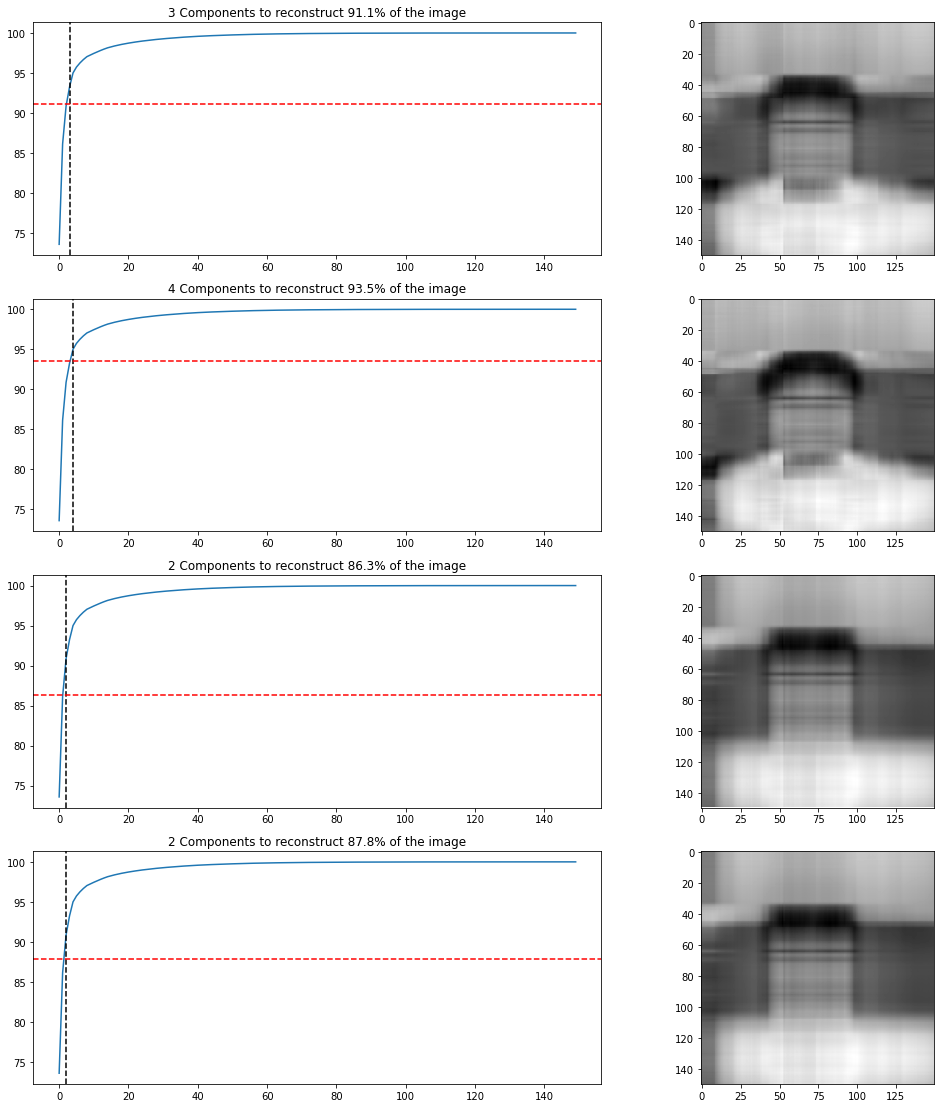

In [8]:
import random
P = np.arange(70, 100, 0.1)
fig, axs = plt.subplots(4, 2)
fig.set_size_inches(15.5, 15.5)

for i in range(0,4):
    a = random.choice(P)
    b = percentage_variance(a)
    c = round(a, 2)
    axs[i,0].plot(var_cumu)
    axs[i,0].set_title('{} Components to reconstruct {}% of the image'.format(b,c))
    axs[i,0].axvline(x=b, color="k", linestyle="--")
    axs[i,0].axhline(y=a, color="r", linestyle="--")
    ipca = IncrementalPCA(n_components=b)
    image_recon = ipca.inverse_transform(ipca.fit_transform(norm_image))
    axs[i,1].imshow(image_recon, cmap='gray')       
fig.tight_layout()

## What is actually happening?

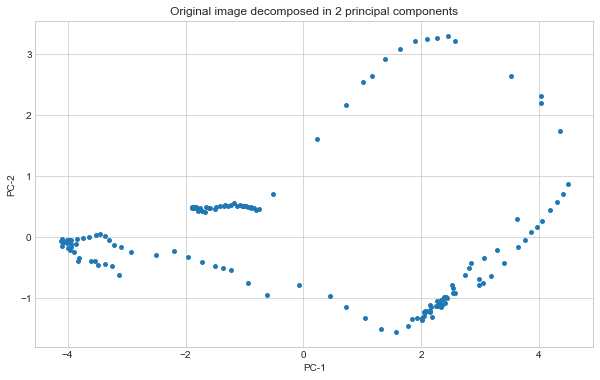

In [9]:
pca = PCA(2) # Let's ask for 2 principal components.
converted_data = pca.fit_transform(norm_image)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map)
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.title("Original image decomposed in 2 principal components")
plt.show()

In the plot above, we have enough information to reconstruct 90% of the image. 

In [10]:
k = np.argmax(var_cumu>90)
k

2